___

# Machine Learning in Geosciences ] 
Department of Applied Geoinformatics and Carthography, Charles University

Lukas Brodsky lukas.brodsky@natur.cuni.cz


## Deep Learning, Convolutional Neural Networks


This notebook introduces the Deep Learning with PyTorch https://pytorch.org: 

* PyTorch introduction 

* PyTorch Linear Model

* PyTorch CNN
    


### PyTorch installation

`pip install torch`
`pip install torchvision`

PyTorch includes a package called torchvision which is used to load and prepare the dataset. It includes two basic functions namely Dataset and DataLoader which helps in transformation and loading of dataset.

In [ ]:
# Common imports
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

# PyTorch imports 
import torch
import torch.nn as nn # Neural Network class
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable


# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

In [ ]:
print(torch.__version__)
print(torchvision.__version__)

### PyTorch NumPy

A PyTorch tensor is similar to a NumPy array. A tensor is an n-dimensional array and with respect to PyTorch, it provides many functions to operate on these tensors.

PyTorch tensors usually utilize GPUs to accelerate their numeric computations. These tensors which are created in PyTorch can be used to fit a network. The user can manually implement the forward and backward passes through the network.

### Dynamic Graphs
Static graphs are nice because user can optimize the graph up front. If programmers are re-using the same graph over and over, then this potentially costly up-front optimization can be maintained as the same graph is rerun over and over.

The major difference between them is that Tensor Flow’s computational graphs are static and PyTorch uses dynamic computational graphs.

#### PyTorch  Abstraction

`Tensor`: Like array in Numpy, but runs on GPU

`Variable`: Stores data and gradient; Node in a computational graph; 


In [ ]:
# 2x2 array
arr = [[1,2], [3,4]]
print(arr)

In [ ]:
np.array(arr)

In [ ]:
# Tensor 
torch.Tensor(arr)

In [ ]:
# Matrices with default values
np.ones((2,2))
torch.ones((2,2))

In [ ]:
# Random 
np.random.rand(2,2)
torch.rand(2,2)

In [ ]:
a = torch.ones(2,2)
print(a.size())

In [ ]:
# Element wise addition
a = torch.ones(2,2)
b = torch.ones(2,2)

c = a + b
c

In [ ]:
c = torch.add(a, b)
c

In [ ]:
# In-place addition
print(c)
c.add_(a)

In [ ]:
# Multiplication, not in-place
print(torch.mul(a, b))

In [ ]:
# Tensor Mean
a = torch.Tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
print(a.size()) 

print(a.mean(dim=0))

### PyTorch Variables
Variables allows us to accumulate gradients!

When using autograd, the forward pass of your network will define a computational graph; nodes in the graph will be Tensors, and edges will be functions that produce output Tensors from input Tensors.
PyTorch Tensors can be created as variable objects where a variable represents a node in computational graph.

In [ ]:
# from torch.autograd import Variable

a = Variable(torch.ones(2,2), requires_grad = True)
a

In [ ]:
# not a variable
torch.ones(2,2)

In [ ]:
# What  is requires_grad?
# Allows calculation of gradients w.r.t. the variable

### NumPy <-> torch.Tensor
`.from_numpy()` & `.to_numpy()`

In [ ]:
np_array = np.ones((2,2))
print(np_array)
print(type(np_array))

In [ ]:
torch_tensor = torch.from_numpy(np_array)
print(torch_tensor)
print(type(torch_tensor))

In [ ]:
# TODO to_numpy()

In [ ]:
# Data types matter! (intentional error)
np_array_new = np.ones((2,2), dtype=np.int8) # solved in PyTorch 1.8.1 
torch.from_numpy(np_array_new)

### Linear Regression

In [ ]:
# Get data 
np.random.seed(42)
n = 50
x = np.random.rand(n)
y = x * np.random.rand(n)

In [ ]:
x_values = [i for i in range(11)]
x_values

# Convert to numpy
x_train = np.array(x_values, dtype=np.float32)
x_train.shape
# important: 2D is required
x_train = x_train.reshape(-1,1)

y_values = [2 * i + 1 for i in x_values]
y_values

y_train = np.array(y_values, dtype=np.float32)
y_train

y_train = y_train.reshape(-1,1)
y_train.shape

nn.Linear
The linear layer is a module that applies a linear transformation on the input using its stored weights and biases.

In [ ]:
# Create Linear Model

class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        
        self.linear = nn.Linear(input_dim, output_dim) # x and y

    def forward(self, x):
        out = self.linear(x)
        return out


In [ ]:
# Instantiate Model Class
input_dim = 1
output_dim = 1
model = LinearRegressionModel(input_dim, output_dim)


In [ ]:
# Instantiate Loss Class (MSE Loss) 

criterion = nn.MSELoss()

In [ ]:
# Instantiate Optimizer Class

# Simplified equation
# Theta = Theta - lr * Grd
# Theta ... parameters (our variables)
# lr ... learning rate (how fast we want to learn)
# Grd ... parameters' gradient

# parameters: alfa & beta  in  y = alfa * x + beta
# desired parameters: alfa = 2, beta = 1 in y = 2x + 1

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#### Training: converting a neural network to functional blocks as shown below
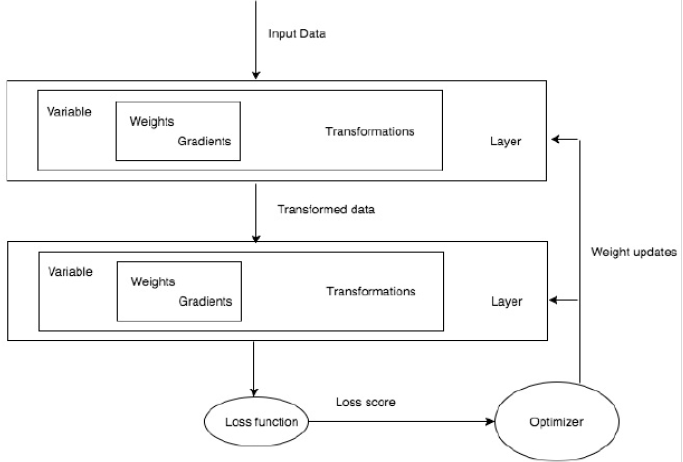

In [ ]:
# Train model
# 1 epoch: going trough the x_train data once
# 100 epochs: 100 x mapping x_train = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Process:
# 1. Convert inputs/labels to variables
# 2. Clear gradient buffers
# 3. Get output given inputs
# 4. Get loss
# 5. Get gradients w.r.t. parameters
# 6. Update parameters using gradients
# 7. repeat


epochs = 100

for epoch in range(epochs):
    epoch += 1
    # numpy to torch
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))

    # Clear gradients w.r.t. parameters
    optimizer.zero_grad()

    # Forward pass: compute predicted y by passing x to the model
    outputs = model(inputs)

    # Calculate loss
    loss = criterion(outputs, labels)

    # Perform a backward pass (backpropagation)
    # Getting gradients w.r.t. parameters
    loss.backward()

    # Update the parameters
    optimizer.step()

    print('epoch {0}, loss {1}'.format(epoch, loss.data))


In [ ]:
# Compare data
predicted = model(Variable((torch.from_numpy(x_train)))).data.numpy()
# plot data
plt.clf()
predicted = model(Variable((torch.from_numpy(x_train)))).data.numpy()
plt.plot(x_train, y_train, 'bo', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

### PyTorch CNN

#### Main steps 
1. Load dataset
2. Make dataset iterable
3. Create model class
4. Instantiate model class
5. Instantiate loss class
6. Instantiate optimizer class
7. Train model

In [ ]:
""" Step 1: Load MNIST Dataset """

# !wget www.di.ens.fr/~lelarge/MNIST.tar.gz
# !tar -zxvf MNIST.tar.gz

In [ ]:
# from torchvision.datasets import MNIST
# transform = transforms.Compose([transforms.ToTensor()])
# train_data = MNIST(root = './MNIST', train=True, download=False, transform=transform)
# val_data = MNIST(root = './MNIST', train=False, download=False, transform=transform)

In [ ]:
""" Step 1: Load MNIST Dataset """

train_dataset = dsets.MNIST(root='./data', train = True, transform=transforms.ToTensor(), download=True)
test_dataset = dsets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

In [ ]:
train_dataset

In [ ]:
test_dataset

In [ ]:
print(train_dataset.train_data.size())
print(train_dataset.train_labels.size())

In [ ]:
print(test_dataset.test_data.size())
print(test_dataset.test_labels.size())

In [ ]:
train_dataset_array = next(iter(train_dataset))[0].numpy()
# train_dataset_array.shape
plt.imshow(train_dataset_array[0,:,:], cmap='gray', interpolation='none')

In [ ]:
next(iter(train_dataset.train_labels)).numpy()

In [ ]:
""" Step 2: Make it iterable """

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)


test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                           batch_size=batch_size,
                                           shuffle=False)

In [ ]:
print(num_epochs)
print(len(train_dataset))
print(batch_size)

In [ ]:
""" Step 3: Create Model Class """

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2)
        self.relu1 = nn.ReLU()

        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)

        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=5, stride=1, padding=2)
        self.relu2 = nn.ReLU()

        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)

        # Fully connected 1 (readout)
        self.fc1 = nn.Linear(16 * 7 * 7, 10)


    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)

        # Max pool 1
        out = self.maxpool1(out)

        # Convolution 2
        out = self.cnn2(out)
        out = self.relu2(out)

        # Max pool 2
        out = self.maxpool2 ( out )

        # Resize
        out = out.view(out.size(0), -1)

        # Linear function (readout)
        out = self.fc1(out)

        return out


In [ ]:
""" Step 4: Instantiate Model Class """

model = CNNModel()

In [ ]:
# PARAMETERS 
# print(model.parameters())
# print(len(list(model.parameters())))

# Convolution 1: 16 kernels
# print(list(model.parameters())[0].size())

# Convolution 1 Bias: 16 kernels
# print(list(model.parameters())[1].size())

# Convolution 2: 16 kernels
# print(list(model.parameters())[2].size())

# Convolution 2 Bias: 16 kernels
# print(list(model.parameters())[3].size())

# Fully connected layer
# print(list(model.parameters())[4].size())

# Fully connected layer Bias
# print(list(model.parameters())[5].size())

In [ ]:
""" Step 5: Initiate Loss Class """

# CNN: Cross Entropy Loss
criterion = nn.CrossEntropyLoss()

In [ ]:
""" Step 6: Instantiate Optimizer Class """

learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
""" Step 7: Train Model """

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # load images as Variables
        images = Variable(images) # X
        labels = Variable(labels) # y 

        # clear gradients w.r.t. parameters
        optimizer.zero_grad()
        # forward pass to get output 
        outputs = model(images)
        # calculate cross entropy loss
        loss = criterion(outputs, labels)
        # getting gradients w.r.t. parameters
        loss.backward()
        # updating parameters
        optimizer.step()
        iter += 1

        if iter % 500 == 0:
            # Calculate accuracy
            correct = 0
            total = 0
            # iterate through test data set
            for images, labels in test_loader:
                # load images to a Torch Variable
                images = Variable(images)

                # forward pass only to get output
                outputs = model(images)
                # get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                # total number of labels
                total += labels.size(0)
                # total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # print loss
            # loss.data[0] X loss.item()
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))


In [ ]:
accuracy